In [1]:
"""Headers"""

from __future__ import print_function
from PIL import Image
import os
import os.path
import numpy as np
import sys
import math
import time
import pickle
import numpy.random

import torch.utils.data as data
from torchvision.datasets.utils import download_url, check_integrity

import csv
import copy
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
import sys
import torch
import torch.utils.data
import torchvision
import torchvision.transforms as transforms

import cv2

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from model import *
from datasetloader import *
from boxplot import *
from coco_dict import *

In [2]:
# ---------------------

train_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                ])
test_transform = None
# ---------------------
st_time = time.time()

#boxParams = [[8, 0.5], [8, 1.], [8, 2], [16, 0.5], [16, 1.], [16, 2.], [32, 0.5], [32, 1.], [32, 2.]]
boxParams = [[32, 0.5], [32, 1.], [32, 2], [64, 0.5], [64, 1.], [64, 2.], [128, 0.5], [128, 1.], [128, 2.]]

TRAIN_BS = 1

trainset = DataSet(fold="train", transform=train_transform, max_img = 10, boxParams = boxParams)

print(trainset.data.shape)

trainLoader = torch.utils.data.DataLoader(trainset, batch_size=TRAIN_BS,
                                          shuffle=True, num_workers=0)
print("Ttrain set size: "+str(len(trainset)))

valset = DataSet(fold="valid", transform=train_transform, max_img = 10, boxParams = boxParams)

valLoader = torch.utils.data.DataLoader(valset, batch_size=TRAIN_BS,
                                          shuffle=True, num_workers=0)
print("Val set size: "+str(len(valset)))

print('Loading Dataset took: ', time.time() - st_time, ' seconds')

(11,)
Ttrain set size: 11
Val set size: 11
Loading Dataset took:  12.29341459274292  seconds


In [24]:
IS_GPU = False

#boxParams = torch.tensor([[8, 0.5], [8, 1.], [8, 2], [16, 0.5], [16, 1.], [16, 2.], [32, 0.5], [32, 1.], [32, 2.]])
boxParams = torch.tensor(boxParams)

rcnn = PreTrainedResNet(feature_extracting = True, model = "resnet18")

#rcnn.load('rpn18_1000')


if IS_GPU:
    rcnn = PreTrainedResNet(feature_extracting = True, model = "resnet18", IS_GPU = True)
    rcnn = rcnn.cuda()

rcnn.train(trainLoader, valLoader, boxParams, NUM_EPOCHS = 10, class_start = 0)

C:\Users\Steve\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


Epoch  0  : Time required ->  1.7473938465118408
Epoch  1  : Time required ->  14.14737057685852
Epoch  2  : Time required ->  14.30109715461731
Epoch  3  : Time required ->  14.224809885025024
Epoch  4  : Time required ->  14.625810384750366
Epoch  5  : Time required ->  13.91794228553772
Epoch  6  : Time required ->  14.3873929977417
Epoch  7  : Time required ->  14.127010583877563
Epoch  8  : Time required ->  14.580836057662964
Epoch  9  : Time required ->  13.984919786453247


In [25]:
#rcnn.train(trainLoader, valLoader, boxParams, NUM_EPOCHS = 15, class_start = 15)

Text(0.5, 1.0, 'Validation Set Loss')

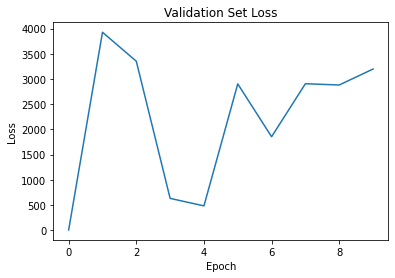

In [26]:
plt.plot(rcnn.valLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Set Loss")

Text(0.5, 1.0, 'Train Set Loss')

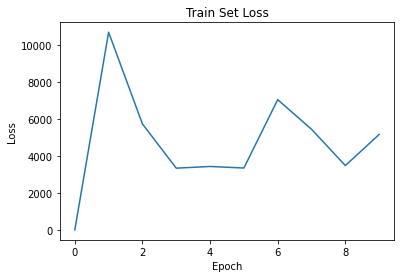

In [27]:
plt.plot(rcnn.trainLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Set Loss")

Text(0.5, 1.0, 'fast RCNN Loss')

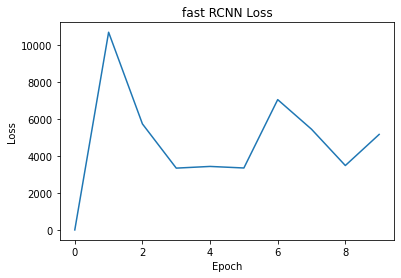

In [28]:
plt.plot(rcnn.fastLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("fast RCNN Loss")

Text(0.5, 1.0, 'RPN Loss')

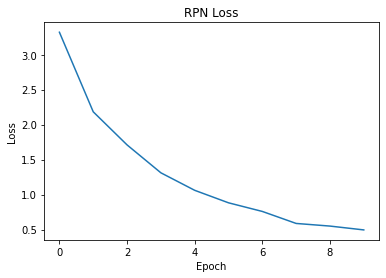

In [29]:
plt.plot(rcnn.rpnLoss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RPN Loss")

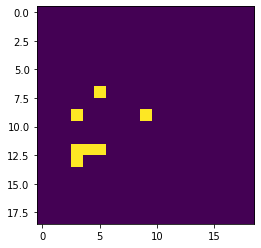

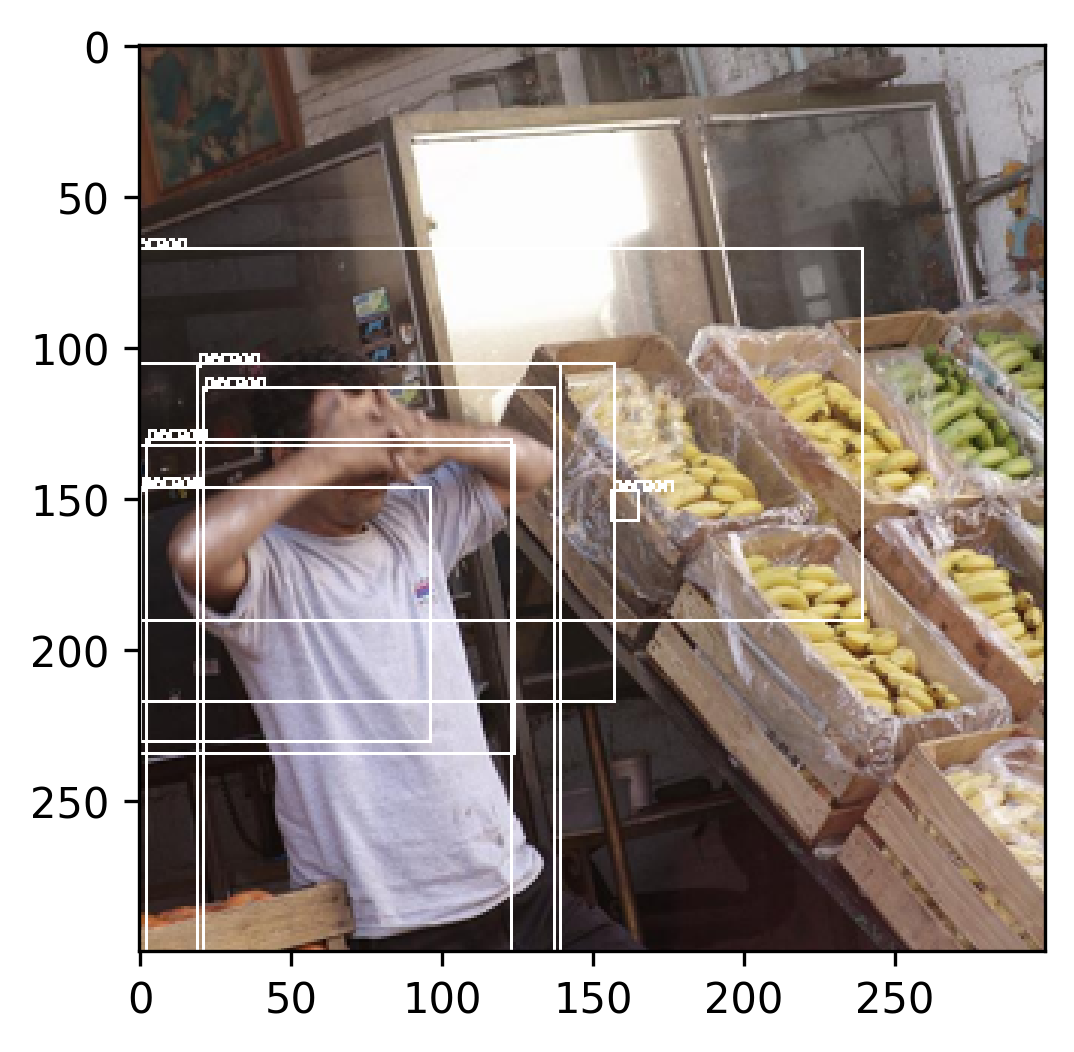

In [37]:
it = iter(valLoader)
img, target = it.next()
rcnn.predict(img, cutoff = 0.7, boxParams = boxParams, dummyLabel = True)

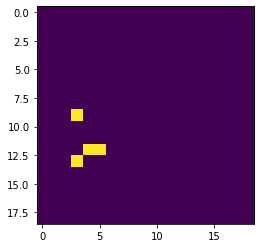

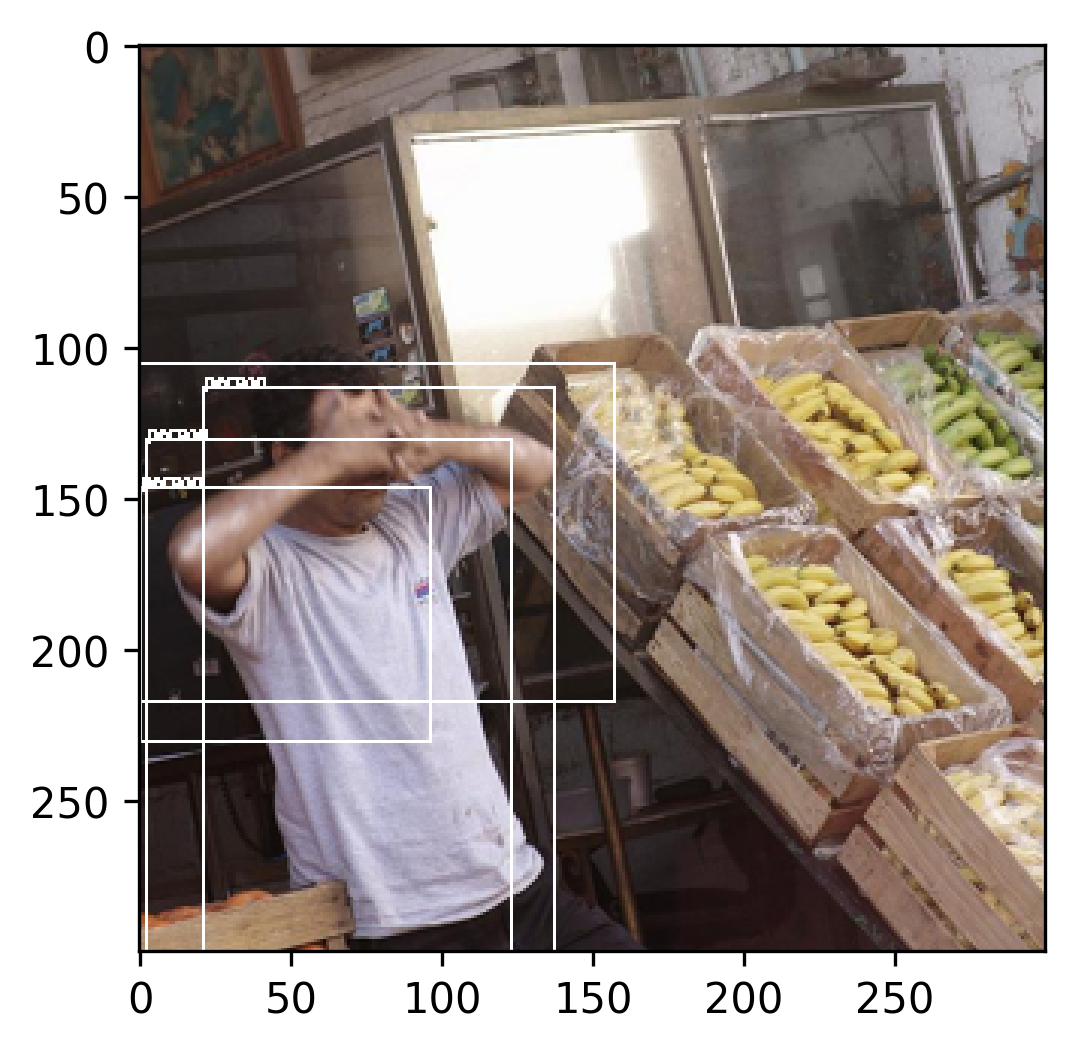

In [39]:
#rcnn.save('rpn18_1000')
rcnn.predict(img, cutoff = 0.9, boxParams = boxParams, dummyLabel = True)

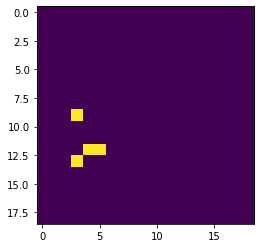

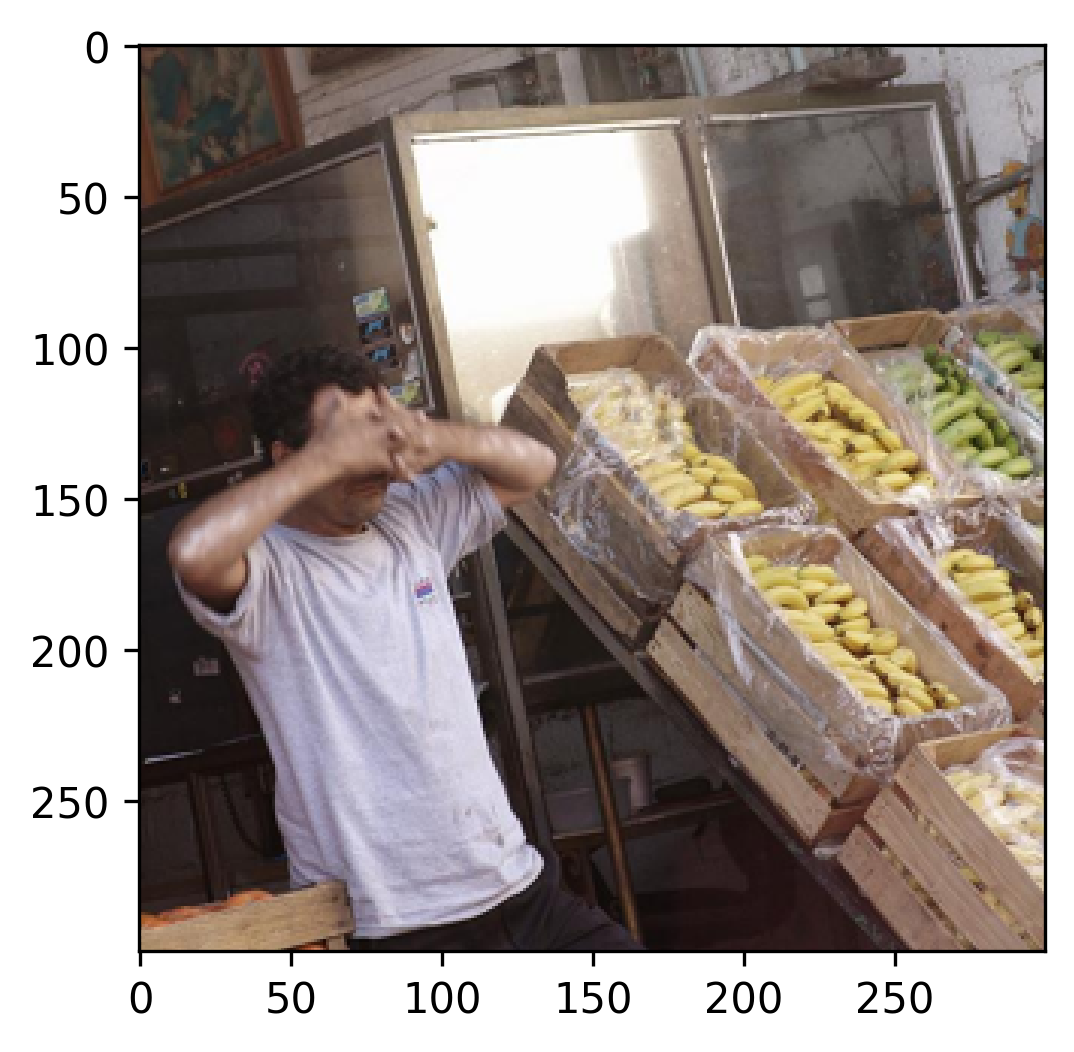

In [38]:
rcnn.predict(img, cutoff = 0.9, boxParams = boxParams, dummyLabel = False)